In [1]:
!pip3 install h5py
!pip install -q gdown httpimport

!mkdir -p data/raw
!mkdir -p data/mnist_m
!mkdir -p data/svhn

from lib import datasets
from lib import plotter

%pylab inline

Populating the interactive namespace from numpy and matplotlib


torch.Size([10, 1, 224, 224])
label :  [6 1 1 6 1 8 6 8 5 4]


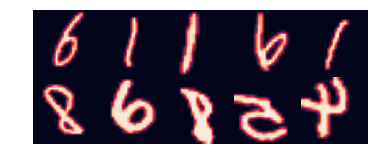

In [2]:
# create object
data = datasets.datasets()

# pick dataset and settings
data.create_dataset(dataset='mnist', img_size=224, data_aug=True)

# create batch loader
loader = data.batch_loader(10)

# plot data
for a, b in (loader['train']):
    print (a.shape)
    plotter.plot_mat(a.numpy())
    print("label : " ,b.numpy())    
    break


label: 3
number of imgs: 60000


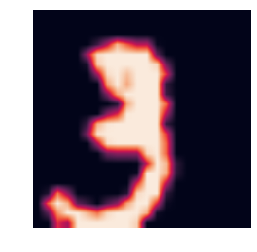

In [3]:
# picking single image and label

plotter.plot_mat((data.item(10, 'train')[0].numpy())[None, :])
print('label:' , data.item(10, 'train')[1].numpy())
print('number of imgs:', data.length('train'))

In [13]:
!mkdir -p data/raw
!mkdir -p data/usps

# USPS dataset
#
# https://www.kaggle.com/bistaumanga/usps-dataset
![ -e data/raw/usps.zip ] || gdown 'https://drive.google.com/uc?id=17DPK0t_kCxnytr8u_FGFDf_V6S2km1Yt' -O data/raw/usps.zip
![ -e data/usps/usps.h5 ] ||  unzip -d data/usps data/raw/usps.zip 

Downloading...
From: https://drive.google.com/uc?id=17DPK0t_kCxnytr8u_FGFDf_V6S2km1Yt
To: /home/lukas/Documents/nn_project/data/raw/usps.zip
2.89MB [00:21, 134kB/s]
Archive:  data/raw/usps.zip
  inflating: data/usps/usps.h5       


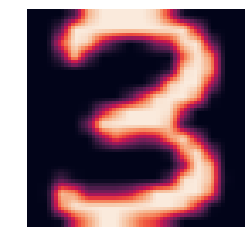

In [2]:
data.create_dataset('usps', img_size=64, data_aug=False)
data.plot_img(2, 'test')

torch.Size([10, 1, 64, 64])
label :  [0 1 9 7 0 1 9 7 7 4]


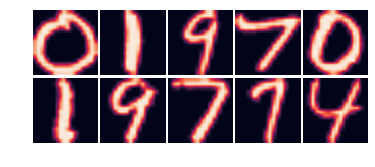

In [45]:
loader = data.batch_loader(10)

# plot data
for a, b in (loader['train']):
    print (a.shape)
    plotter.plot_mat(a.numpy())
    print("label : " ,b.numpy())    
    break

In [2]:
data = datasets.datasets()
data.create_dataset('pacs', img_size=227, data_aug=True, pacs='cartoon')
 

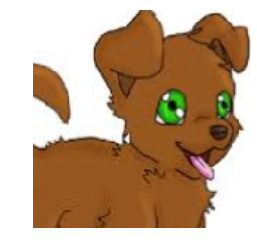

In [3]:
data.plot_img(111, 'train')

labels:  tensor([7, 5, 7], dtype=torch.int8)


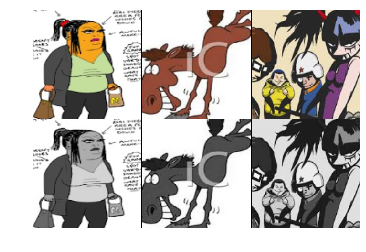

In [4]:
loader = data.batch_loader(3)

for img, label in loader['train']:
    img2 = img.clone()
    print("labels: ", label)
    gray = data.to_grayscale(img2).numpy()
    gray = np.stack((gray,)*3, axis=1)
    plotter.plot_mat(np.vstack([img.numpy(),gray]))
    break

In [3]:
data = datasets.datasets()
data.create_dataset('mnist_m', img_size=227, data_aug=True)
 

labels:  tensor([0, 9, 3])


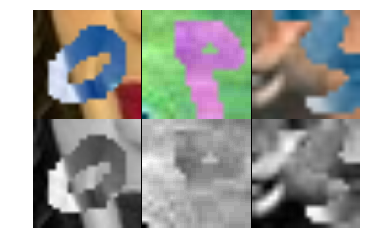

In [6]:
loader = data.batch_loader(3)

for img, label in loader['train']:
    img2 = img.clone()
    print("labels: ", label)
    gray = data.to_grayscale(img2).numpy()
    gray = np.stack((gray,)*3, axis=1)
    plotter.plot_mat(np.vstack([img.numpy(),gray]))
    break

In [2]:
data = datasets.datasets()
data.create_dataset('svhn', img_size=32, data_aug=False)
 

Using downloaded and verified file: ./data/svhn/train_32x32.mat
Using downloaded and verified file: ./data/svhn/test_32x32.mat
Using downloaded and verified file: ./data/svhn/extra_32x32.mat


labels:  tensor([5, 9, 1])


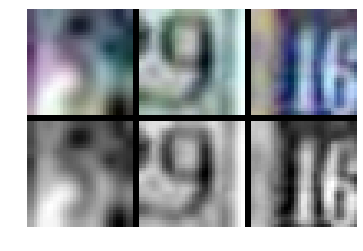

In [6]:
loader = data.batch_loader(3)

for img, label in loader['train']:
    img2 = img.clone()
    print("labels: ", label)
    gray = data.to_grayscale(img2).numpy()
    gray = np.stack((gray,)*3, axis=1)
    plotter.plot_mat(np.vstack([img.numpy(),gray]))
    break

In [ ]:
!mkdir -p data/raw
!mkdir -p data/pacs
# PACS dataset
# 
# http://www.eecs.qmul.ac.uk/~dl307/project_iccv2017
![ -e data/raw/PACS.zip ] || gdown 'https://drive.google.com/uc?id=1Pcacb_ZQxMDLZGs7nISIaAgfE5_bfYLz' -O data/raw/PACS.zip
![ -e data/pacs/art_painting_test.hdf5 ] || unzip -d data/pacs data/raw/PACS.zip 

![ -e data/pacs/art_painting_train.hdf5 ] || gdown 'https://drive.google.com/uc?id=1qvJeF3WgfZgBgNBnzJGOLVOMncLgi5uN' -O data/pacs/art_painting_train.hdf5
![ -e data/pacs/art_painting_validate.hdf5 ] || gdown 'https://drive.google.com/uc?id=1e2WfiUmpv25FzRHYrA_8rooqEWicwbGA' -O data/pacs/art_painting_validate.hdf5

![ -e data/pacs/cartoon_test.hdf5 ] || gdown 'https://drive.google.com/uc?id=16pF2YwohULpkXV3NNRiBvDy4SBWyhxvz' -O data/pacs/cartoon_test.hdf5
![ -e data/pacs/cartoon_train.hdf5 ] || gdown 'https://drive.google.com/uc?id=1BpaNvaSRXZ09xwnC5TWBv3ktOBj36mp7' -O data/pacs/cartoon_train.hdf5
![ -e data/pacs/cartoon_validate.hdf5 ] || gdown 'https://drive.google.com/uc?id=1ID0Y-v0EvKz1VL7XIKfZtb2FOxF89gVQ' -O data/pacs/cartoon_validate.hdf5

![ -e data/pacs/photo_test.hdf5 ] || gdown 'https://drive.google.com/uc?id=1e8PvYV1Rbc3uDDKt0iADNNT6fXH95FIC' -O data/pacs/photo_test.hdf5
![ -e data/pacs/photo_validate.hdf5 ] || gdown 'https://drive.google.com/uc?id=1gNHdceC8tS1JLcb6sZGaT7w6zwwTkiXp' -O data/pacs/photo_validate.hdf5

![ -e data/pacs/sketch_train.hdf5 ] || gdown 'https://drive.google.com/uc?id=1li1j1-315EmjXbuqRnMIxiH_u7Kpj81b' -O data/pacs/sketch_train.hdf5
![ -e data/pacs/sketch_validate.hdf5 ] || gdown 'https://drive.google.com/uc?id=1xj-PJhD4xBtPv6EETGImlA0Pju7KdIH0' -O data/pacs/sketch_validate.hdf5

!mv "data/pacs/Train val splits and h5py files pre-read/"* data/pacs
!rm -rf "data/pacs/Train val splits and h5py files pre-read"

Downloading...
From: https://drive.google.com/uc?id=1e8PvYV1Rbc3uDDKt0iADNNT6fXH95FIC
To: /home/lukas/Documents/nn_project/data/pacs/photo_test.hdf5
213MB [35:06, 113kB/s]  